In [25]:
# Import necessary packages. 
import numpy as np
import pylab as py
import os
import glob
import pdb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from specutils import Spectrum1D
import stsynphot as stsyn  
import astropy.units as u
import math
from synphot import Observation
import pysynphot as S
global sig_int
import pandas as pd
sig_int = 0.1

os.chdir("/Users/alexgagliano/Documents/Research/2020oi/scripts/BPASS/BPASSv2.2.1_release-07-18-Tuatara/BPASSv2.2.1_bin-imf135_100")

In [26]:
fn = 'colours-bin-imf135_100.zem5.dat'
df = pd.read_csv(fn, delim_whitespace=True, header=None)

In [27]:
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1]
    else:
        return array[idx]

In [28]:
HST_20oi = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/HST_preExplosionPhotometry_dataOnly.csv", delim_whitespace=True)

In [29]:
#the actual observations
#note - need to convert to Vega AND absolute mag given distance and extinction!! 
HST_20oi = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/HST_preExplosionPhotometry_dataOnly.csv", delim_whitespace=True)
HST_20oi = HST_20oi.drop_duplicates(subset=['Instrument', 'Filter'])

f814_hrc = HST_20oi.loc[HST_20oi['Instrument'].isin(['ACS/HRC']) & HST_20oi['Filter'].isin(['F814W']), 'Magnitude'].values[0]
#f555_hrc = HST_20oi.loc[HST_20oi['Instrument'].isin(['ACS/HRC']) & HST_20oi['Filter'].isin(['F555W']), 'Magnitude'].values[0]
#f330_hrc = HST_20oi.loc[HST_20oi['Instrument'].isin(['ACS/HRC']) & HST_20oi['Filter'].isin(['F330W']), 'Magnitude'].values[0]
#f160_ir = HST_20oi.loc[HST_20oi['Instrument'].isin(['WFC3/IR']) & HST_20oi['Filter'].isin(['F160W']), 'Magnitude'].values[0]
f555_wfc2 = HST_20oi.loc[HST_20oi['Instrument'].isin(['WFC3/UVIS']) & HST_20oi['Filter'].isin(['F555W']), 'Magnitude'].values[0]
#f775_wfc2 = HST_20oi.loc[HST_20oi['Instrument'].isin(['WFC3/UVIS']) & HST_20oi['Filter'].isin(['F775W']), 'Magnitude'].values[0]
#f475_wfc2 = HST_20oi.loc[HST_20oi['Instrument'].isin(['WFC3/UVIS']) & HST_20oi['Filter'].isin(['F475W']), 'Magnitude'].values[0]

#Filter Name 	Data 	Pivot Wavelength 	Rectangular Width 	Solar Absolute
#Magnitude (AB) 	Ab to Vega Conversion
#(Vega-AB) #http://www.baryons.org/ezgal/filters.php
#ACS WFC F814W	e r d	8055	1733.27	4.522	-0.426
#ACS WFC F555W	e r d	5360	1124.10	4.838	0.005
#WFPC2 F555W	e r d	5442	1455.36	4.821	-0.001

#convert to vega 
f814_hrc += -0.426 
f555_wfc2 += -0.001

dist = 1.71e7 #distance to M100 in parsec
#convert to absolute magnitude 
M_f814_hrc = f814_hrc - 5* np.log10(dist/10)
M_f555_wfc2 = f555_wfc2 - 5*np.log10(dist/10)
#f814w - 8115.3 angstroms
#f555w - 5356 angstroms
f814_hrc_err = HST_20oi.loc[HST_20oi['Instrument'].isin(['ACS/HRC']) & HST_20oi['Filter'].isin(['F814W']), 'Uncertainty'].values[0]
#f555_hrc_err = HST_20oi.loc[HST_20oi['Instrument'].isin(['ACS/HRC']) & HST_20oi['Filter'].isin(['F555W']), 'Uncertainty'].values[0]
#f330_hrc_err = HST_20oi.loc[HST_20oi['Instrument'].isin(['ACS/HRC']) & HST_20oi['Filter'].isin(['F330W']), 'Uncertainty'].values[0]
#f160_ir_err = HST_20oi.loc[HST_20oi['Instrument'].isin(['WFC3/IR']) & HST_20oi['Filter'].isin(['F160W']), 'Uncertainty'].values[0]
f555_wfc2_err = HST_20oi.loc[HST_20oi['Instrument'].isin(['WFC3/UVIS']) & HST_20oi['Filter'].isin(['F555W']), 'Uncertainty'].values[0]
#f775_wfc2_err = HST_20oi.loc[HST_20oi['Instrument'].isin(['WFC3/UVIS']) & HST_20oi['Filter'].isin(['F775W']), 'Uncertainty'].values[0]
#f475_wfc2_err = HST_20oi.loc[HST_20oi['Instrument'].isin(['WFC3/UVIS']) & HST_20oi['Filter'].isin(['F475W']), 'Uncertainty'].values[0]

In [30]:
M_f814_hrc

-11.29918055196077

In [31]:
# Fitzpatrick (1999)
import numpy as np
import extinction
from scipy import interpolate


wave = np.array([5356, 8115.3])  # wavelength in Angstroms
#E(B-V) = 0.173
#E(B-V) = A_V/R_V
#Assuming R_V is 3.1, A_V is then 0.5363
ext555, ext814 = extinction.fitzpatrick99(wave, 0.5363, 3.1)
#apply extinction to photometry
M_f814_hrc -= ext814
M_f555_wfc2 -= ext555

In [32]:
f814_hrc

19.8658

In [33]:
M_f814_hrc

-11.588874455312594

In [34]:
#age
#metallicity
#fn = 'colours-bin-imf135_100.z' + metallicity[0.001] + '.dat'
#pd.read_csv(fn, delim_whitespace=True, header=None)

In [35]:
age_init = 7. #age in log10(years)
Z_init = 0.001
theta_init = [age_init, Z_init]

def fit(theta):
    metallicity = {0.001: '001', 0.002:'002', 0.003:'003', 0.004:'004', .006:'006', .008:'008', 
  0.010:'010', 0.014:'014', 0.020:'020', 0.030:'030',  0.040:'040', 1.e-4:'em4', 1.e-5:'em5'}
    metallicity_arr = [1.e-5, 1.e-4, 0.001, 0.002, 0.003, 0.004, 0.006, 0.008, 0.01, 0.014, 0.02, 0.03, 0.04]
    logage_arr = np.linspace(6,11,51)
    Z = find_nearest(metallicity_arr, theta[1])
    logage = find_nearest(logage_arr, theta[0])
    Zstr = metallicity[Z]
    fn = 'colours-bin-imf135_100.z' + Zstr + '.dat'
    df = pd.read_csv(fn, delim_whitespace=True, header=None)
    df_row = df[np.abs(df[0] - logage) < 0.01]
    return np.array([df_row[21].values[0], df_row[19].values[0]]) #a single passband for now, in absolute Vega magnitudes
    
def chi_sq(theta, obs, obs_sig):    
    chisq = np.zeros(len(obs_sig))
    for i in np.arange(len(chisq)):
        chisq += (fit(theta)[i] - obs[i])**2/(obs_sig[i]**2+sig_int**2)
    return np.sum(chisq)

def neg_log_likelihood(theta, obs, obs_sig):    
    return 0.5*chi_sq(theta, obs, obs_sig)

def loglike(theta, obs, obs_sig):    
    return -0.5*chi_sq(theta, obs, obs_sig)

# only if the prior makes sense for all vals simultaneously do we 
# accept it
def log_prior(theta):
    age = theta[0]
    Z = theta[1]
    logprior_age = logprior_Z = -np.inf
    
    if (6<=age<=11) and  (1.e-5<=Z<=0.004):
        logprior_age=logprior_Z = 0
    prior = logprior_age + logprior_Z
    return np.sum(prior)

# the posterior is the combination of the prior and the likelihood
def log_posterior(theta, obs, obs_sig):
    return log_prior(theta)+neg_log_likelihood(theta, obs, obs_sig)

In [36]:
metallicity = {0.001: '001', 0.002:'002', 0.003:'003', 0.004:'004', .006:'006', .008:'008', 
0.010:'010', 0.014:'014', 0.020:'020', 0.030:'030',  0.040:'040', 1.e-4:'em4', 1.e-5:'em5'}
metallicity_arr = [1.e-5, 1.e-4, 0.001, 0.002, 0.003, 0.004, 0.006, 0.008, 0.01, 0.014, 0.02, 0.03, 0.04]
logage_arr = np.linspace(6,11,51)
obs_sig = np.array([f814_hrc_err, f555_wfc2_err])
obs = np.array([M_f814_hrc, M_f555_wfc2])

run_Z = []
run_age = []
run_like = []
run_chisq = []

fit_vals_814 = []
fit_vals_555 = []

for i in np.arange(len(metallicity_arr)):
    for j in np.arange(len(logage_arr)):
        Z = metallicity_arr[i]
        logage = logage_arr[j]
        theta = [logage, Z]
        run_chisq.append(chi_sq(theta, obs, obs_sig))
        run_like.append(neg_log_likelihood(theta,obs,obs_sig))
        run_Z.append(Z)
        run_age.append(logage)
        fit_vals_814.append(fit(theta)[0])
        fit_vals_555.append(fit(theta)[1])
        
run_Z = np.array(run_Z)
run_age = np.array(run_age)
run_like = np.array(run_like)
run_chisq = np.array(run_chisq)

resultDF = pd.DataFrame({'logAge':run_age, 'Z':run_Z, 'negLogLike':run_like, 'chi_sq':run_chisq})

In [2]:
resultDF

NameError: name 'resultDF' is not defined

In [37]:
xx, yy = np.meshgrid(logage_arr, metallicity_arr)
zz_814 = xx.copy()
zz_555 = xx.copy()
for i in np.arange(np.shape(xx)[0]):
        for j in np.arange(np.shape(xx)[1]):
            zz_814[i][j] = fit(np.array([xx[i][j], yy[i][j]]))[0]
            zz_555[i][j] = fit(np.array([xx[i][j], yy[i][j]]))[1]
f_814 = interpolate.interp2d(xx, yy, zz_814, kind='linear')
f_555 = interpolate.interp2d(xx, yy, zz_555, kind='linear')

[(6e-06, 0.06)]

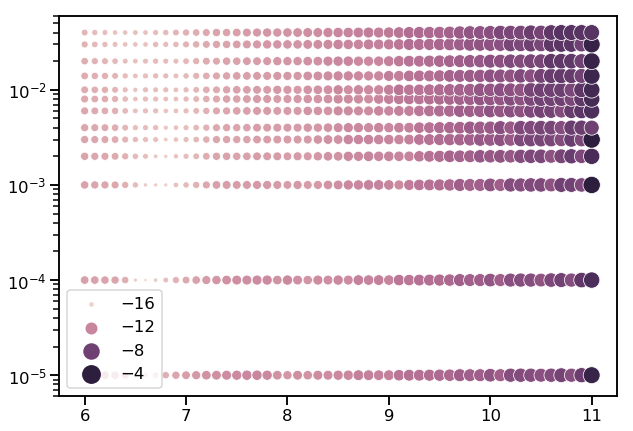

In [38]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
fig = plt.figure(figsize=(10,7))

g = sns.scatterplot(
    x=xx.ravel(), y=yy.ravel(),
    hue=zz_814.ravel(), cmap=cmap, size=zz_814.ravel(), sizes=(10, 300), ax=fig.gca()
)
sns.set_context("talk")
g.set(yscale="log")
g.set(ylim=(6.e-6, 6.e-2))

In [39]:
print(np.where(xx == 6.))
print(np.where(yy == 1.e-3))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]))


In [40]:
xx[2][0]

6.0

In [41]:
yy[2][0]

0.001

In [42]:
zz_814[2][0]

-13.363539999999999

In [43]:
zz_555[2][0]

-13.65197

In [44]:
f_814([6.0], [0.001])

array([-13.38107065])

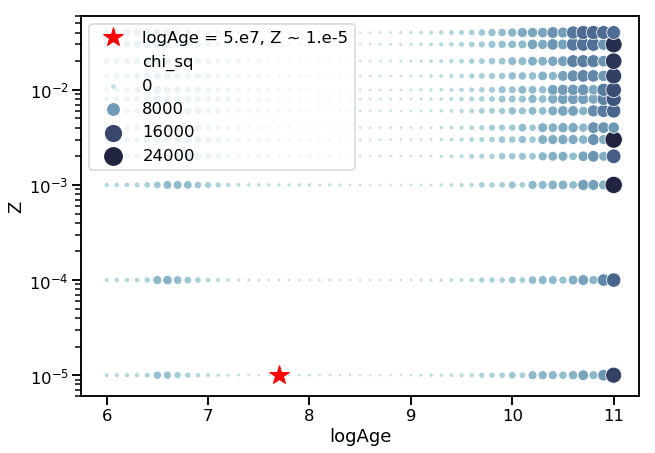

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
fig = plt.figure(figsize=(10,7))
g = sns.scatterplot(
    data=resultDF,
    x="logAge", y="Z",
    hue="chi_sq", size="chi_sq",
    palette=cmap, sizes=(10, 300), ax=fig.gca()
)
sns.set_context("talk")
g.set(yscale="log")
g.set(ylim=(6.e-6, 6.e-2))
#g.ax.xaxis.grid(True, "minor", linewidth=.25)
#g.ax.yaxis.grid(True, "minor", linewidth=.25)
#g.despine(left=True, bottom=True)
plt.plot(7.7, 0.00001, '*', ms=20, c='r', label='logAge = 5.e7, Z ~ 1.e-5')
plt.legend(loc='upper left')

In [46]:
resultDF[resultDF['chi_sq'] == np.nanmin(resultDF['chi_sq'])]

,logAge,Z,negLogLike,chi_sq
17,7.7,0.00001,26.508501,53.017002


In [47]:
#### trying now with dynesty
import numpy as np

# Define the dimensionality of our problem.
ndim = 2

# Define our 3-D correlated multivariate normal likelihood.
#C = np.identity(ndim)  # set covariance to identity matrix
#C[C==0] = 0.95  # set off-diagonal terms
#Cinv = np.linalg.inv(C)  # define the inverse (i.e. the precision matrix)
#lnorm = -0.5 * (np.log(2 * np.pi) * ndim +
#                np.log(np.linalg.det(C)))  # ln(normalization)
def fit_interp(theta):
    return np.array([f_814([theta[0]], [theta[1]])[0], f_555([theta[0]], [theta[1]])[0]])

def chi_sq(theta):    
    chisq = np.zeros(len(obs_sig))
    for i in np.arange(len(chisq)):
        chisq += (fit_interp(theta)[i] - obs[i])**2/(obs_sig[i]**2+sig_int**2) #change to the interpolation functions
    return np.sum(chisq) 

def loglike(theta):    
#    """The log-likelihood function."""#
    return -0.5*chi_sq(theta)

# Define our uniform prior.
def ptform(u):
    """Transforms the uniform random variable `u ~ Unif[0., 1.)`
    to the parameter of interest `x ~ Unif[-10., 10.)`."""
    x = 2. * u[0] - 1.  # scale and shift to [-1., 1.)
    x *= 2.5  # scale to [-2.5, 2.5)
    x += 8.5 # scale to [6, 11] #age 
    
    y = u[1]  # [0, 1.)
    y = y*0.09999 + 1.e-5 #1.e-5 to 1.e-1
    
#(6<=age<=11) and  (1.e-5<=Z<=4.e-3): 
    return np.array([x,y])

In [48]:
import dynesty

# "Static" nested sampling.
#from multiprocessing import Pool
from schwimmbad import MultiPool

#with MultiPool() as pool:
#    sampler = dynesty.NestedSampler(loglike, ptform, ndim, pool=pool)
#    sampler.run_nested()
#    sresults = sampler.results

# "Dynamic" nested sampling.
#from multiprocessing import Pool

with MultiPool() as pool:
    dsampler = dynesty.DynamicNestedSampler(loglike, ptform, ndim, pool=pool)
    dsampler.run_nested(dlogz_init=0.05)
    #dsampler.run_nested()
    dresults = dsampler.results

6178it [01:37, 63.38it/s, batch: 0 | bound: 152 | nc: 484 | ncall: 147721 | eff(%):  4.168 | loglstar:   -inf < -0.064 <    inf | logz: -9.905 +/-  0.188 | dlogz:  0.084 >  0.050]  


KeyboardInterrupt: 

In [174]:
from dynesty import utils as dyfunc
dresults = sresults
# Extract sampling results.
samples = dresults.samples  # samples
weights = np.exp(dresults.logwt - dresults.logz[-1])  # normalized weights

# Compute 10%-90% quantiles.
quantiles = [dyfunc.quantile(samps, [0.1, 0.9], weights=weights)
             for samps in samples.T]

# Compute weighted mean and covariance.
mean, cov = dyfunc.mean_and_cov(samples, weights)

# Resample weighted samples.
samples_equal = dyfunc.resample_equal(samples, weights)

# Generate a new set of results with statistical+sampling uncertainties.
results_sim = dyfunc.simulate_run(dresults)

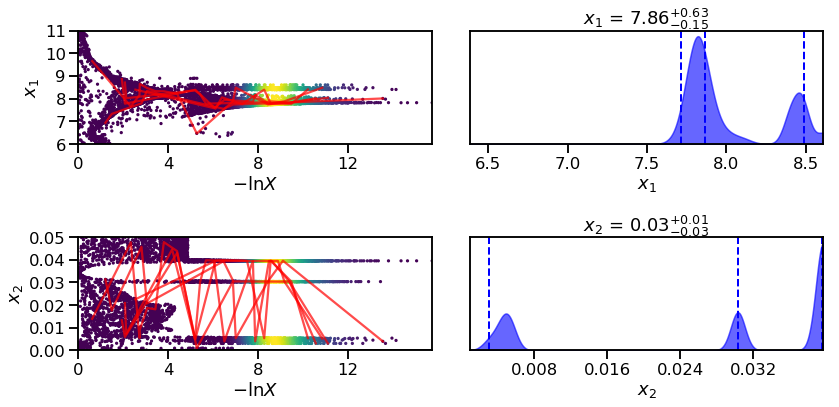

In [175]:
from dynesty import plotting as dyplot
fig, axes = dyplot.traceplot(dresults, truths=np.zeros(ndim),
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True,
                             connect_highlight=range(5))
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

In [ ]:
# initialize figure
#fig, axes = plt.subplots(2, 5, figsize=(25, 10))
#axes = axes.reshape((2, 5))  # reshape axes

# add white space
#[a.set_frame_on(False) for a in axes[:, 2]]
#[a.set_xticks([]) for a in axes[:, 2]]
#[a.set_yticks([]) for a in axes[:, 2]]

# plot initial run (res1; left)
fg, ax = dyplot.cornerpoints(dresults, cmap='plasma', truths=[7.7, 0.02],
                             kde=False)
fg.set_figheight(10)
fg.set_figwidth(10)

In [ ]:
#finally, running in the traditional way with emcee
import emcee

#from multiprocessing import Pool
from schwimmbad import MultiPool

N = 1000
pos = theta_init + 1.e-1*np.random.randn(N, 2)
obs_sig = np.array([f814_hrc_err, f555_wfc2_err])
obs = np.array([M_f814_hrc, M_f555_wfc2])

nwalkers, ndim = pos.shape
with MultiPool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(obs, obs_sig), pool=pool)
    sampler.run_mcmc(pos, N, progress=True);#, store=True);

In [ ]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()

labels = [r"Age", "Metallicity"]
for i in range(2):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number");

In [ ]:
# show the full corner plot 
import corner
samples_postBurnIn = samples[10:,:,:]
samples_post = samples_postBurnIn.reshape((-1, 2))
fig = corner.corner(samples_post, labels=labels,smooth=True);